In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

C:\ProgramData\Anaconda3\envs\py3-TF2.0\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\envs\py3-TF2.0\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\envs\py3-TF2.0\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<h2>Loading Data</h2>

In [2]:
drug_related_deaths = pd.read_csv("inputs/CT_Accidental_Drug_Related_Deaths_2012-2020_raw.csv");
drug_related_deaths.head()

,ID,Date,Date Type,Age,Sex,Race,Residence City,Residence County,Residence State,Death City,...,Morphine (Not Heroin),Hydromorphone,Xylazine,Other,Opiate NOS,Any Opioid,Manner of Death,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,12-0187,07/17/2012,DateofDeath,34.0,Female,White,MAHOPAC,PUTNAM,NaN,DANBURY,...,NaN,NaN,NaN,Duster,NaN,NaN,Accident,"DANBURY, CT\r\n(41.393666, -73.451539)",NaN,"CT\r\n(41.575155, -72.738288)"
1,12-0258,10/01/2012,DateofDeath,51.0,Male,White,PORTLAND,MIDDLESEX,NaN,PORTLAND,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"PORTLAND, CT\r\n(41.581345, -72.634112)","PORTLAND, CT\r\n(41.581345, -72.634112)","CT\r\n(41.575155, -72.738288)"
2,13-0146,04/28/2013,DateofDeath,28.0,Male,White,NaN,NaN,NaN,HARTFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"HARTFORD, CT\r\n(41.765775, -72.673356)","CT\r\n(41.575155, -72.738288)","CT\r\n(41.575155, -72.738288)"
3,14-0150,04/06/2014,DateofDeath,46.0,Male,White,WATERBURY,NaN,NaN,TORRINGTON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"TORRINGTON, CT\r\n(41.812186, -73.101552)","WATERBURY, CT\r\n(41.554261, -73.043069)","CT\r\n(41.575155, -72.738288)"
4,14-0183,04/27/2014,DateofDeath,52.0,Male,White,NEW LONDON,NaN,NaN,NEW LONDON,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"NEW LONDON, CT\r\n(41.355167, -72.099561)","NEW LONDON, CT\r\n(41.355167, -72.099561)","CT\r\n(41.575155, -72.738288)"


In [3]:
opioids = pd.read_csv("inputs/opioids.csv")
opioids.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [4]:
overdoses = pd.read_csv("inputs/overdoses.csv")
overdoses.head()

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [5]:
prescriber = pd.read_csv("inputs/prescriber-info.csv")
prescriber.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


<h2>Data Preprocessing</h2>

In [6]:
overdoses['Deaths'] = overdoses['Deaths'].str.replace(',', '')
overdoses['Deaths'] = overdoses['Deaths'].astype(int)

In [7]:
overdoses['Population'] = overdoses['Population'].str.replace(',', '')
overdoses['Population'] = overdoses['Population'].astype(int)

In [8]:
overdoses['Deaths Per Capita'] = (overdoses['Deaths']/overdoses['Population'])

In [9]:
overdoses.head()

,State,Population,Deaths,Abbrev,Deaths Per Capita
0,Alabama,4833722,723,AL,0.000150
1,Alaska,735132,124,AK,0.000169
2,Arizona,6626624,1211,AZ,0.000183
3,Arkansas,2959373,356,AR,0.000120
4,California,38332521,4521,CA,0.000118


In [10]:
def plot_graph(deaths_per_capita, states, title):
    
    ## Bar chart
    Xaxis = deaths_per_capita
    Yaxis = states #similar_df.loc[player_id].map(id_name).values[::-1]

    fig = go.Figure(go.Bar(
                x=Xaxis,
                y=Yaxis,
                orientation='h'))
    
    fig.update_layout(title_text=title)
    fig.show()

In [11]:
states = overdoses['State'] 
death_per_capita = overdoses['Deaths Per Capita']
title = "Deaths per capita"
plot_graph(death_per_capita, states, title)


states = overdoses['State'] 
death_per_capita = overdoses['Deaths']
title = "Deaths"
plot_graph(death_per_capita, states, title)    

# plt.rcdefaults()
# fig, ax = plt.subplots()

# death_per_capita = overdoses['Deaths Per Capita']
# states = overdoses['State'] 
# y_pos = np.arange(len(overdoses['State']))
# error = np.random.rand(len(overdoses['State']))

# ax.barh(y_pos, death_per_capita, align='center')
# ax.set_yticks(y_pos)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('States')
# ax.set_title('Deaths Per Capita')


# plt.show()

<h2>Data Cleaning</h2>

<h>Comparing the number of states between our datasets</h>

In [12]:
prescriber.State.unique()

array(['TX', 'AL', 'NY', 'AZ', 'NV', 'PA', 'NH', 'WI', 'PR', 'CO', 'OH',
       'MA', 'CT', 'FL', 'MN', 'UT', 'IA', 'IL', 'MT', 'IN', 'VA', 'CA',
       'OR', 'NE', 'MI', 'NM', 'TN', 'KS', 'LA', 'MD', 'MO', 'AR', 'NC',
       'NJ', 'SC', 'WY', 'ME', 'OK', 'ND', 'KY', 'GA', 'DE', 'WA', 'RI',
       'WV', 'AK', 'ID', 'VT', 'HI', 'MS', 'DC', 'SD', 'AE', 'ZZ', 'GU',
       'AA', 'VI'], dtype=object)

In [13]:
# Compare to overdoses dataset
overdoses.Abbrev.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

<h>We can see that the number of states between the two datasets aren't equal.</h>
<h>So, We'll compare the state list & clean up states to make the dataset state list equal.<h>
<h>Removing the extra states from the prescriber datasets, we get the following</h>

In [14]:
prescriber = prescriber[prescriber.State != 'AE']
prescriber = prescriber[prescriber.State != 'ZZ']
prescriber = prescriber[prescriber.State != 'AA']
prescriber = prescriber[prescriber.State != 'PR']
prescriber = prescriber[prescriber.State != 'GU']
prescriber = prescriber[prescriber.State != 'VI']

In [15]:
prescriber.State.unique()

array(['TX', 'AL', 'NY', 'AZ', 'NV', 'PA', 'NH', 'WI', 'CO', 'OH', 'MA',
       'CT', 'FL', 'MN', 'UT', 'IA', 'IL', 'MT', 'IN', 'VA', 'CA', 'OR',
       'NE', 'MI', 'NM', 'TN', 'KS', 'LA', 'MD', 'MO', 'AR', 'NC', 'NJ',
       'SC', 'WY', 'ME', 'OK', 'ND', 'KY', 'GA', 'DE', 'WA', 'RI', 'WV',
       'AK', 'ID', 'VT', 'HI', 'MS', 'DC', 'SD'], dtype=object)

<h>Listing out all Credentials</h>

In [16]:
prescriber.Credentials.unique()

array(['DDS', 'MD', 'M.D.', 'DO', 'RN, MSN, ANP-BC', 'O.D.', nan,
       'D.D.S.', 'ACNP', 'DPM', 'PAC', 'A.R.N.P.', 'MSN, APRN, BC',
       'D.O.', 'M.D,', 'APRN', 'PA-C', 'CNM', 'RN CNP', 'DDS MS',
       'DNP, APRN-BC, FNP', 'PHARM D.', 'CRNP', 'ARNP', 'D.D.S', 'DPM MD',
       'FNP', 'NP', 'DMD', 'PA', 'MPT', 'D.M.D.', 'APRN BC FNP',
       'DMD,FAGD', 'MD,MPH', 'BDS,  DDS', 'D.D.S., F.A.G.D.', 'DDS, MD',
       'PMH, CNP/CNS', 'P.A.', 'M.D', 'D.O., MPH & TM', 'M.D., PH.D.',
       'RPA-C', 'MD FACOG', 'F.N.P.', 'D.O', 'ANP', 'FNP-C', 'D.M.D',
       'D.P.M.', 'OD', 'O. D.', 'CNS', 'MS, APRN, FNP-C', 'MD MPH',
       'NP-C', 'PHARM D', 'M.D.,', 'MBBS', 'PHYSICIAN ASSISTANT',
       'M.D. FCCP', 'MD.', 'CNP', 'DPT', 'D.D.S, M.D.', 'APRN, BC',
       'P.A.-C', 'M.D.P.A.', 'F.N.P.-C', 'M. D.', 'CFNP', 'C.N.P', 'APN',
       'D.D.S., A.P.C.', 'NP-C, MSN', 'MD FACP', 'R.P.A.', 'N.P.',
       'APRN, CNS', 'D.D.S., M.D.', 'PMHNP', 'MD, PHD, ABFP', 'APNP',
       'DMD, MD, PLLC', 'M.D., P.

<h>Listing out specialities</h>

In [17]:
prescriber.Specialty.unique()

array(['Dentist', 'General Surgery', 'General Practice',
       'Internal Medicine', 'Hematology/Oncology', 'Family Practice',
       'Nurse Practitioner', 'Optometry', 'Cardiology',
       'Obstetrics/Gynecology', 'Podiatry', 'Physician Assistant',
       'Diagnostic Radiology',
       'Student in an Organized Health Care Education/Training Program',
       'Neurology', 'Certified Nurse Midwife', 'Rheumatology',
       'Pharmacist', 'Urology', 'Cardiac Electrophysiology',
       'Dermatology', 'Emergency Medicine', 'Psychiatry & Neurology',
       'Infectious Disease', 'Psychiatry', 'Gastroenterology',
       'Ophthalmology', 'Thoracic Surgery',
       'Oral Surgery (dentists only)', 'Anesthesiology',
       'Orthopedic Surgery', 'Otolaryngology', 'Pulmonary Disease',
       'Neuropsychiatry', 'Physical Therapist', 'Pediatric Medicine',
       'Physical Medicine and Rehabilitation', 'Maxillofacial Surgery',
       'Certified Clinical Nurse Specialist', 'Preventive Medicine',
       'A

<h>Male <b>vs</b> Female</h>

In [18]:
prescriber.groupby('Gender').size() / prescriber.groupby('Gender').size().sum()

Gender
F    0.378166
M    0.621834
dtype: float64

<h>The number of prescribers who prescribed opioid drugs <b>vs</b> those who did not</h>

In [19]:
prescriber.groupby('Opioid.Prescriber').size() / prescriber.groupby('Opioid.Prescriber').size().sum()

Opioid.Prescriber
0    0.41282
1    0.58718
dtype: float64

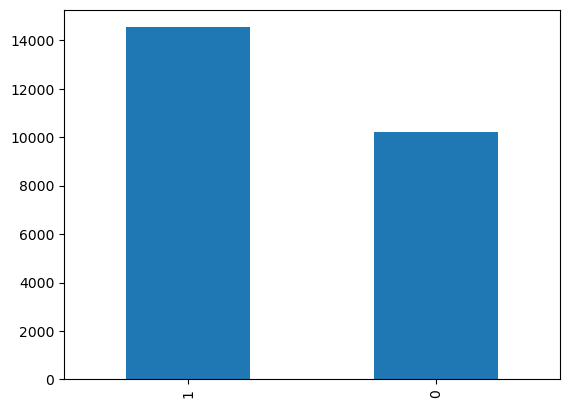

In [20]:
# Plotting
pd.value_counts(prescriber['Opioid.Prescriber']).plot.bar()
plt.show()

<h>We can see from the above graph that our dataset has a slightly higher number of opioid prescribers</h>

In [21]:
#opioids = df_data_1 
name = opioids['Drug Name']
import re
new_name = name.apply(lambda x:re.sub("\ |-",".",str(x)))
columns = prescriber.columns
Abandoned_variables = set(columns).intersection(set(new_name))
Kept_variable = []
for each in columns:
    if each in Abandoned_variables:
        pass
    else:
        Kept_variable.append(each)

In [22]:
df = prescriber[Kept_variable]
df.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [23]:
df = df.drop(df.columns[[0, 3]], axis = 1) 
df.head()

,Gender,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,M,TX,Dentist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,F,AL,General Surgery,0,0,0,0,0,0,134,...,0,0,0,0,0,0,0,0,35,1
2,F,NY,General Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,M,AZ,Internal Medicine,0,0,0,0,21,0,0,...,0,0,0,0,0,0,0,0,0,1
4,M,NV,Hematology/Oncology,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [31]:
X = df.iloc[:,1:242]
y = df['Opioid.Prescriber']
X.head()

,State,Specialty,ABILIFY,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,ALPRAZOLAM,AMIODARONE.HCL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
0,TX,Dentist,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AL,General Surgery,0,0,0,0,0,0,134,0,...,0,0,0,0,0,0,0,0,0,35
2,NY,General Practice,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
3,AZ,Internal Medicine,0,0,0,0,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NV,Hematology/Oncology,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,28,0,0,0


<h>Train-Test Splits</h>

In [25]:
pd.options.mode.chained_assignment = None
acc_per = 0
roc_per = 0
acc_Knn = 0
acc_GB  = 0
roc_GB  = 0
roc_Knn  = 0
acc_DT  = 0
roc_DT  = 0
acc_list_per = []
roc_list_per = []
acc_list_knn = []
roc_list_knn = []
acc_list_gb = []
roc_list_gb = []
acc_list_dt = []
roc_list_dt = []
for i in range(100):
    train,test = train_test_split(df,test_size = 0.2,random_state = 42)
    Categorical_columns = ['Gender','State','Specialty']

    for col in Categorical_columns:
        train[col] = pd.factorize(train[col], sort = True)[0]
        test[col] = pd.factorize(test[col],sort = True)[0]
    
    # Set our features.
    features = train.iloc[:,1:242] #make sure we only use the columns that we want as our features
    features_test = test.iloc[:,1:242]
    y_train = train['Opioid.Prescriber']
    y_test = test['Opioid.Prescriber']
    #features.head()
    clf_per = Perceptron(max_iter=1000, tol=1e-3)
    clf_per.fit(features, y_train)
    y_pred_P = clf_per.predict(features_test)
    acc = accuracy_score(y_test, y_pred_P);
    acc_per += acc
    acc_list_per.append(acc)
    
    clf_knn = KNeighborsClassifier(n_neighbors=17)

    clf_knn.fit(features, y_train)

    y_pred_KN = clf_knn.predict(features_test)
    clf_knn.kneighbors(features_test);
    
    acc_Knn += accuracy_score(y_test, y_pred_KN)
    acc_list_knn.append(accuracy_score(y_test, y_pred_KN))
    
    
    clf_gnb = GaussianNB()
    clf_gnb.fit(features, y_train)

    y_pred_GB = clf_gnb.predict(features_test)
    
    acc_GB += accuracy_score(y_test, y_pred_GB)
    acc_list_gb.append(accuracy_score(y_test, y_pred_GB))  
    
    clf_dtc = DecisionTreeClassifier()
    clf_dtc.fit(features, y_train)

    y_pred_dt = clf_dtc.predict(features_test)

    acc_DT += accuracy_score(y_test, y_pred_dt)
    acc_list_dt.append(accuracy_score(y_test, y_pred_dt))

print("{} \n\tAcc: {} \t\n".format(str(type(clf_per)).split('.')[-1][:-2], (acc_per)/100,(np.std(acc_list_per))))
print("{} \n\tAcc: {} \t\n".format(str(type(clf_knn)).split('.')[-1][:-2], (acc_Knn)/100,(np.std(acc_list_knn))))
print("{} \n\tAcc: {} \t\n".format(str(type(clf_gnb)).split('.')[-1][:-2], (acc_GB)/100,(np.std(acc_list_gb))))
print("{} \n\tAcc: {} \t\n".format(str(type(clf_dtc)).split('.')[-1][:-2], (acc_DT)/100,(np.std(acc_list_dt))))

Perceptron 
	Acc: 0.6978998384491113 	

KNeighborsClassifier 
	Acc: 0.7673667205169619 	

GaussianNB 
	Acc: 0.6211631663974159 	

DecisionTreeClassifier 
	Acc: 0.6993638933764136 	



<h2>5-Cross Validation</h2>

In [32]:
X = df.iloc[:,1:242]
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
X['State'] = labelencoder.fit_transform(X['State'])
X['Specialty'] = labelencoder.fit_transform(X['Specialty'])
y = df['Opioid.Prescriber']
clfs = [
    Perceptron(tol=1e-3),
    KNeighborsClassifier(),
    GaussianNB(),
    DecisionTreeClassifier()
]

n_splits = 5
for i, clf in enumerate(clfs):
    skf_acc_avg = 0
    skf_auc_avg = 0
    acc_list = []
    roc_list = []
    
    for k in range(100):
        skf_acc = 0
        skf_auc = 0
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=i)
        for train_index, test_index in skf.split(X, y):
            # Split the data into training and testing sets.
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Fit the model and get predictions.
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)


            skf_acc += accuracy_score(y_test, y_pred)


        skf_acc = round(skf_acc / n_splits, 3)
        
        skf_acc_avg += skf_acc
        acc_list.append(skf_acc)
        roc_list.append(skf_auc)

        clf_name = str(type(clf)).split('.')[-1][:-2]
    
    print("{} \n\tAcc: {} \tstd_dev: {}\n".format(clf_name, skf_acc_avg/100,(np.std(acc_list)), skf_auc_avg/100,(np.std(roc_list))))

Perceptron 
	Acc: 0.6970000000000012 	std_dev: 1.1102230246251565e-16

KNeighborsClassifier 
	Acc: 0.7819999999999979 	std_dev: 1.1102230246251565e-16

GaussianNB 
	Acc: 0.6120000000000004 	std_dev: 1.1102230246251565e-16

DecisionTreeClassifier 
	Acc: 0.7784400000000008 	std_dev: 0.0010326664514740478

